In [31]:
import gym
from gym import spaces
import numpy as np
from numpy import random
import seaborn
import time
import matplotlib.pyplot as plt
import time

# PART I: Define the Environment

The environment that we defined is called "GameEnv". It is a 4x4 grid world where the agent moves around to collect rewards, avoid traps, and reach the goal to collect a final reward.

**Actions**

The agent has 4 possible actions:

- Move right
- Move left
- Move up
- Move down

**States**

The states are represented by a 4x4 grid where each cell can have one of the following values:

+ 1 if the agent is present in that cell
+ 0.8 if the cell contains the target goal position
+ 0.6 if the cell contains the +5 gold coin
+ 0.4 if the cell contains the +4 gold coin
+ 0.2 if the cell contains the -7 trap
+ 0.1 if the cell contains the -6 trap

**Rewards**

The agent receives different rewards based on the state it moves to after taking an action:

- +20 if the agent reaches the target goal position
- +5 or +4 if the agent reaches the respective gold coins
- -7 or -6 if the agent enters the respective trap

**Objective**

The main objective of the agent is to navigate through the grid world and reach the target goal position while collecting the largest possible reward.


In [32]:
class GameEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, timestep):
        self.action_space = spaces.Discrete(4) 
        self.observation_space = spaces.Discrete(16)  
        self.max_timesteps = timestep
        
        
    def step(self, action):

        #self.state = np.random.choice(self.observation_space.n)
        done = False # initialize done to False
        if action == 0:
            self.agent_pos[0] += 1  #down
        if action == 1:
            self.agent_pos[0] -= 1  #up
        if action == 2:
            self.agent_pos[1] += 1  #right
        if action == 3:
            self.agent_pos[1] -= 1  #left

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))     
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.5
        self.state[tuple(self.trap1_pos)] = 0.2
        self.state[tuple(self.trap2_pos)] = 0.1
        self.state[tuple(self.agent_pos)] = 1.0
        observation = self.state.flatten()
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 20 #Target position: Given big reward if it reaches target
            done = True   #stops the agent from continuing to move (terminal state)
            #print("\nTerminal State reached!\n")

        elif (self.agent_pos == self.trap1_pos).all():
            reward = -7 #A negative reward of -6 if it enters trap

        elif (self.agent_pos == self.trap2_pos).all():
            reward = -6 #A negative reward of -6 if it enters trap
            
        elif (self.agent_pos == self.coin1_pos).all():
            reward = +5 #A reward of +5
            self.coin1_pos = [-1,-1]  #removes the coin once collected

        elif (self.agent_pos == self.coin2_pos).all():
            reward = +4 #A reward of +5
            self.coin2_pos = [-1,-1]  #removes the coin once collected

            
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        info = {}
        return observation, reward, done, info
    


    def reset(self):
        
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]       
        self.trap1_pos = [2,0]
        self.trap2_pos = [2,3]
        self.coin1_pos = [1,1]
        self.coin2_pos = [1,3] 

        
        self.state[tuple(self.agent_pos)] = 1.0
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.4
        self.state[tuple(self.trap1_pos)] = 0.2
        self.state[tuple(self.trap2_pos)] = 0.1
        observation = self.state.flatten()
        return observation

    def render(self):
        plt.imshow(self.state)
       

In [33]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

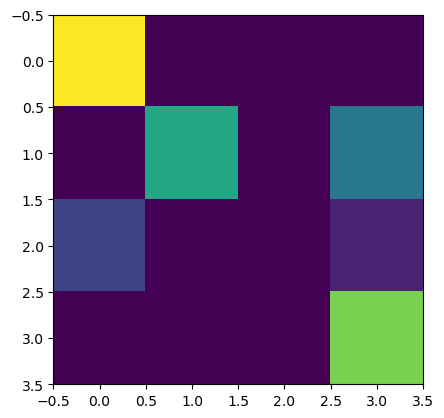

In [34]:
envview = GameEnv(5)
envview.reset()
envview.render()

Step 1
Chosen action:  1 (Up)
Observation:  [1.  0.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 2
Chosen action:  1 (Up)
Observation:  [1.  0.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 3
Chosen action:  2 (Right)
Observation:  [0.  1.  0.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 4
Chosen action:  2 (Right)
Observation:  [0.  0.  1.  0.  0.  0.6 0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 5
Chosen action:  0 (Down)
Observation:  [0.  0.  0.  0.  0.  0.6 1.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  0 

Step 6
Chosen action:  3 (Left)
Observation:  [0.  0.  0.  0.  0.  1.  0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.8]
Reward:  5 

Step 7
Chosen action:  3 (Left)
Observation:  [0.  0.  0.  0.  1.  0.  0.  0.5 0.2 0.  0.  0.1 0.  0.  0.  0.6]
Reward:  0 

Step 8
Chosen action:  0 (Down)
Observation:  [0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.  0.  0.1 0.  0.  0.  0.6]
Reward:  -7 

S

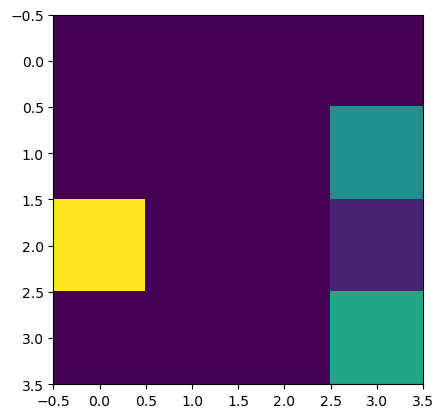

In [35]:
#Test the environment is working
timestep=10

envtest = GameEnv(timestep)
envtest.reset()

agent = RandomAgent(envtest)

obs = envtest.reset()
done = False
step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

rwd=0
step=0
while not done:
    step=step+1
    print("Step",step)
    action = agent.step(obs)
    print("Chosen action: ", action, step_labels[action])
    observation, reward, done, info = envtest.step(action)
    rwd+=reward
    print("Observation: ", observation)
    print("Reward: ", reward,'\n')
    #print("Info", info)
    envtest.render()
    
print("Total Reward:", rwd)


# PART 2: Implementating SARSA

In [36]:
#Define parameters

timestep=25
total_episodes = 2000
alpha = 0.8
gamma = 0.9
epsilon = 1
decay=(0.01/epsilon)**(1/total_episodes)

#define new environment
env = GameEnv(timestep)
env.reset()

#define parameters to track reward, loss, average steps for plots
total_reward =[]
avg_loss=0
total_loss=[]
step_count=0
avg_steps=[]


#define epsilon-greedy function
def greedyEp(state, Q):
    if np.random.uniform(0, 1) < epsilon:
        act = np.random.choice(env.action_space.n)
        #print("chosen random")
    else:
        #print("chosen greedy")
        act = np.argmax(Q[np.where(state==1)[0][0]][:])
    return act

#Initializing the Q table
Q= np.zeros((env.observation_space.n, env.action_space.n))

#Begin Q-learning
for episode in range(total_episodes):
    #print("Episode:", episode+1)
    ep_reward=0
    step=0
    state = env.reset()
    done=False
 
    while not done:
        step=step+1
        action = greedyEp(state, Q)
        #print("Chosen action: ", action, step_labels[action])

 
        next_state, reward, done, info= env.step(action)
        #print("Observation: ", next_state)
        #print("Reward: ", reward,'\n')
 
        #Choosing the next action
        next_action = greedyEp(next_state, Q)
        #print("Next action: ", next_action, step_labels[next_action])

    
        #Calculating new Q table row at this state
        prediction = Q[np.where(state==1)[0][0]][action]
        target = reward + gamma * Q[np.where(next_state==1)[0][0]][next_action]
        loss=target - prediction
        avg_loss +=loss
        Q[np.where(state==1)[0][0]][action] = Q[np.where(state==1)[0][0]][action] + alpha * loss
        #print("Prediction:",prediction, "New value:", V[np.where(state==1)[0][0]][action])
        state = next_state
        action = next_action
         
        #Tracking reward
        ep_reward =ep_reward+ reward
      
        #Decrease epsilon
        if epsilon > 0.01:
            epsilon =epsilon*decay
    
    #track data for plots and print progress periodically
    step_count+=step       
    total_reward.append(ep_reward)
    #print("Total reward for this episode:", ep_reward,"\n")
    total_loss.append(avg_loss/20)
    if (episode%100==0):
        avg_steps.append(step_count/100)
        step_count=0
        print("Episode",episode,"/",total_episodes,"complete")
        
        print("Current Q-table:\n", Q,"\n\n")    
    #env.render()

Episode 0 / 2000 complete
Current Q-table:
 [[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.64  0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [-4.8   0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [16.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]] 


Episode 100 / 2000 complete
Current Q-table:
 [[  0.87832902   3.1969478   10.17041067   2.46292535]
 [ 14.76723177   6.27443825   0.32018688   7.11134095]
 [  4.4652611    0.34925506   0.2994279   13.2485761 ]
 [  9.30014174   0.           0.           0.43245925]
 [ -2.10832154  -1.48843488  16.10468394   9.22863669]
 [  3.34530769   0.76141602  12.75532252   2.83920359]
 [  2.23167211   3.99706266  14.74815338   8.156792  ]
 [ 12.           3.09633104   3.07690457   3.07023625]
 [ -5.26558513   8.26368074  -4.20

Episode 1000 / 2000 complete
Current Q-table:
 [[  3.9334436    8.3295414   10.7892       7.83603577]
 [  8.88448332   9.51055843  11.988        8.7982953 ]
 [ 13.32         0.34925506   0.2994279    9.51839172]
 [ 10.50002835   0.           0.           0.43245925]
 [ -2.10832154   3.00736336  10.38644895   3.17628374]
 [  6.14852385  10.40193038   6.04707655   3.66583568]
 [  4.10325902  10.53014305  14.8         10.43613694]
 [ 12.           7.31536826   9.55144047  11.44403803]
 [ -5.26558513   8.26368074  -4.20822822 -10.42390634]
 [  0.          11.11247287   2.87211582  -3.09837125]
 [  0.           2.70564224  12.           2.79497085]
 [ 20.          10.7737983   11.99995398  10.74511493]
 [  0.          -6.33820629   0.           0.        ]
 [  0.          -1.19171769   0.           0.        ]
 [ 13.824        0.          19.2          0.        ]
 [  0.           0.           0.           0.        ]] 


Episode 1100 / 2000 complete
Current Q-table:
 [[  3.9334436    5.967

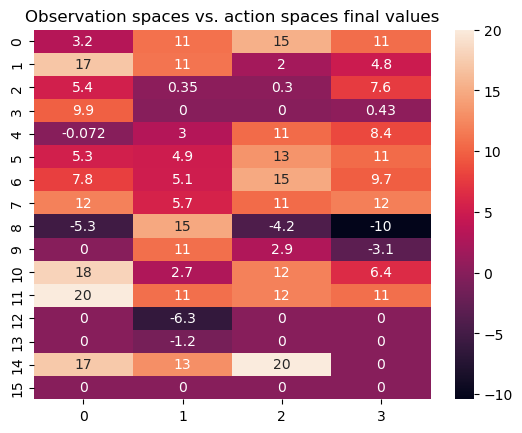

In [37]:
seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.show()

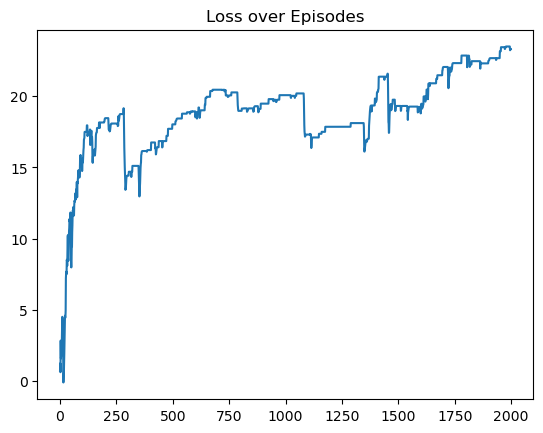

In [38]:
plt.plot(total_loss)
plt.title("Loss over Episodes")
plt.show()

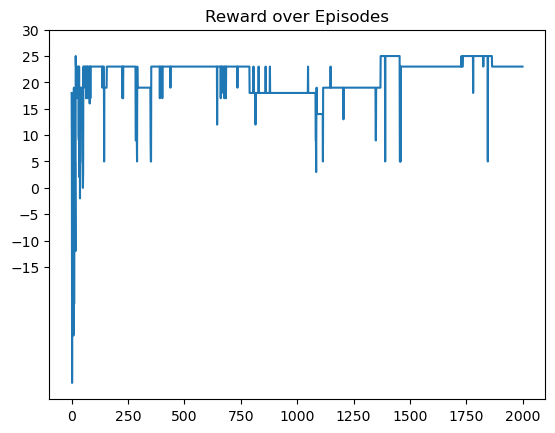

In [45]:
plt.plot(total_reward)
plt.title("Reward over Episodes")
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

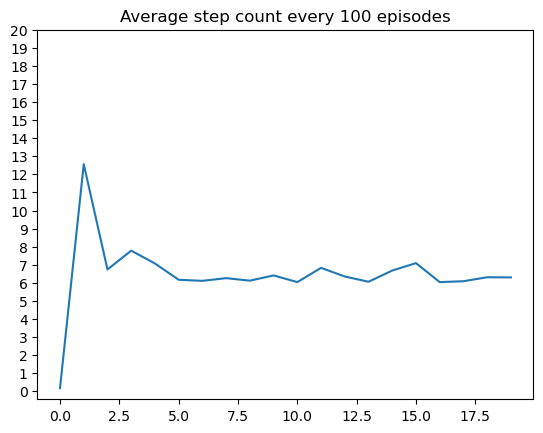

In [47]:
plt.plot(avg_steps)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 21, step=1))
plt.show()

References
1. RL textbook: http://incompleteideas.net/book/RLbook2020.pdf
2. Random Agent class demo
3. Q-learning vs SARSA (reference only): https://towardsdatascience.com/q-learning-and-sasar-with-python-3775f86bd178
4. 